# Image Classification Using Inception Module and Functional API on CIFAR-10 Dataset

In [40]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential , Model
from keras import datasets, models
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization , Input , Conv2D , MaxPooling2D , concatenate , Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import numpy as np

## Loading the dataset

In [32]:
(X_train , Y_train) , (X_test , Y_test) = datasets.cifar10.load_data() #loading the dataset

In [ ]:
batch_size = 64
num_classes = 10
epochs = 100

In [33]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

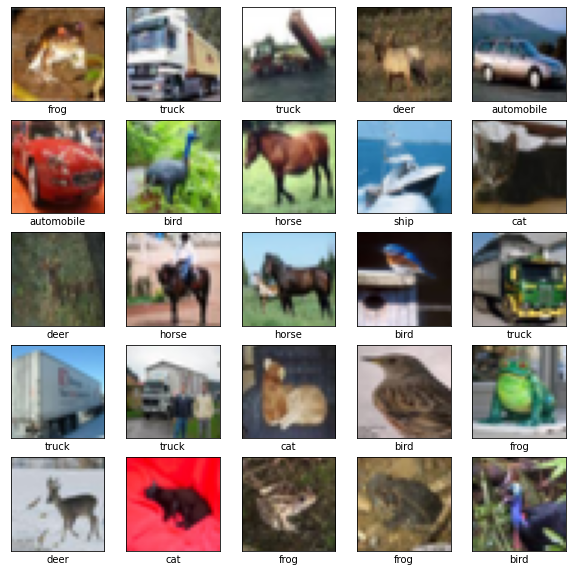

In [34]:
# some visuals from the dataset
plt.figure(figsize=[10,10])
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i][0]])  

plt.show()

In [35]:
X_train = X_train.astype('float32')  # data type conversion
Y_train = Y_train.astype('float32')

X_train = X_train / 255   #normalizing the values
Y_train = Y_train/ 255

print("X_Train  Shape: ",X_train.shape)
print(X_train.shape[0] ,"train samples")
print(X_test.shape[0] , "test samples")

X_Train  Shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [36]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)  #one hot vector encoding
Y_test = keras.utils.to_categorical(Y_test , num_classes)


## Setting up the Model with Inception Module

In [37]:
inputs = Input(shape=(32,32,3))

# First block
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Second block
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Third block
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Inception module
tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(x)
tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), padding='same', strides=(1, 1))(x)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

# Merging the towers
x = concatenate([tower_1, tower_2, tower_3], axis=-1)

# Fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)


# Create the model
model = Model(inputs=inputs, outputs=outputs)


In [38]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 32, 32, 32)   896         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 32, 32, 32)   128         conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 32, 32, 32)   9248        batch_normalization_26[0][0]     
____________________________________________________________________________________________

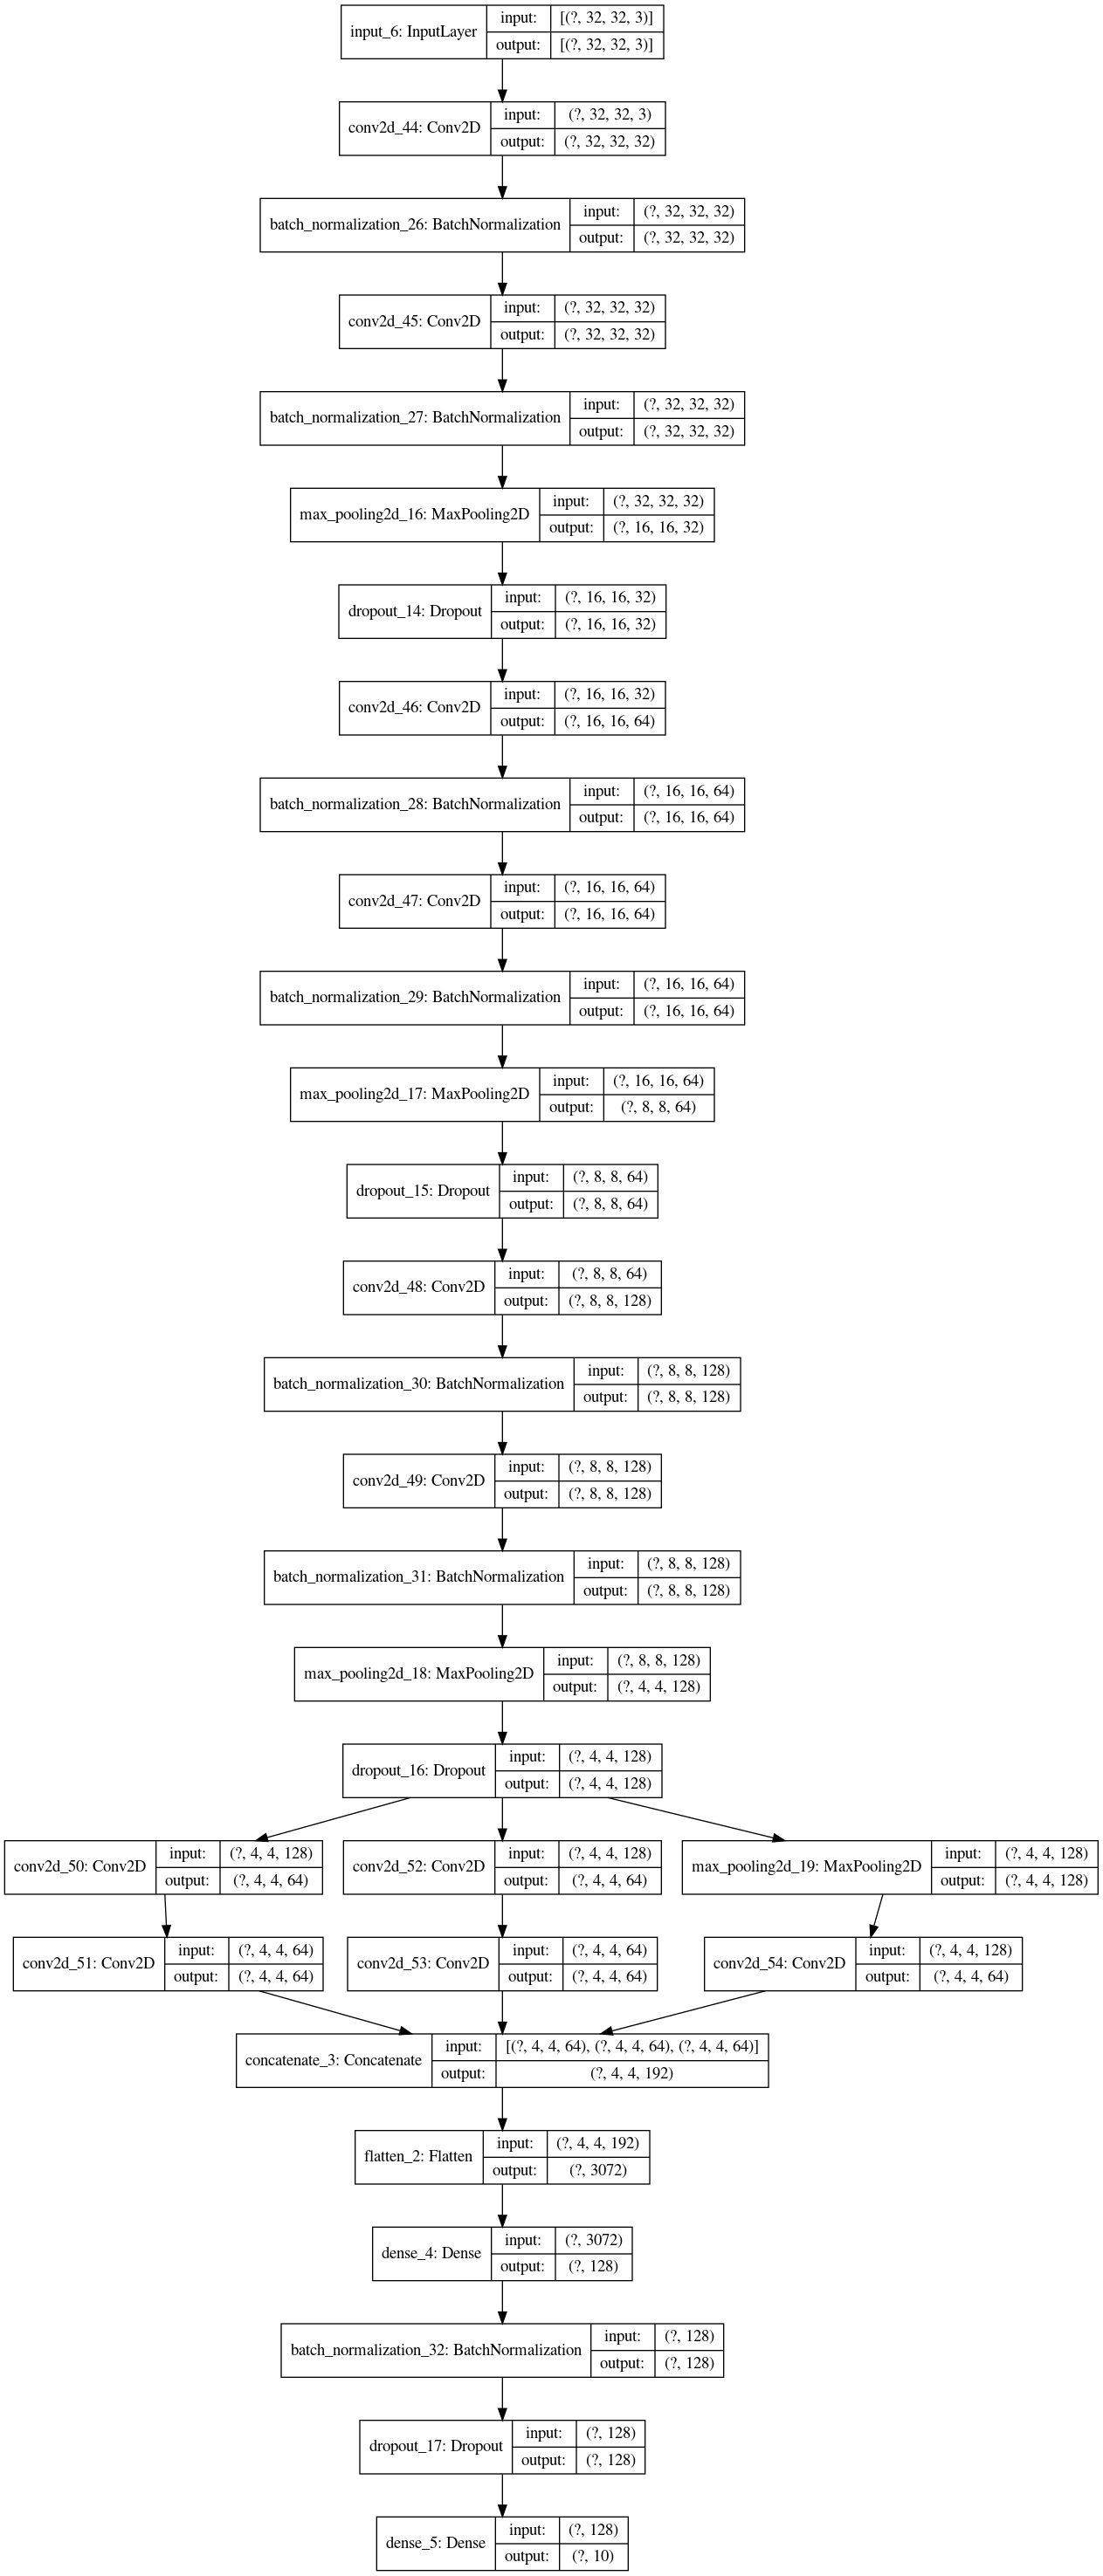

In [43]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [19]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

## Training the model


In [20]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 8s 10ms/step - loss: 1.7316 - accuracy: 0.4394 - val_loss: 1.3081 - val_accuracy: 0.5625
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.1609 - accuracy: 0.6197 - val_loss: 1.2591 - val_accuracy: 0.5814
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 0.9781 - accuracy: 0.6839 - val_loss: 0.9404 - val_accuracy: 0.6871
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 0.8725 - accuracy: 0.7199 - val_loss: 1.0416 - val_accuracy: 0.6668
Epoch 5/100
782/782 [==============================] - 7s 10ms/step - loss: 0.8130 - accuracy: 0.7426 - val_loss: 0.9368 - val_accuracy: 0.6916
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 0.7610 - accuracy: 0.7604 - val_loss: 0.7849 - val_accuracy: 0.7495
Epoch 7/100
782/782 [==============================] - 7s 10ms/step - loss: 0.7186 - accuracy: 0.7745 - val_loss: 0.7446 - val_accuracy:

## Visualizing Result

Text(0.5, 1.0, 'Loss Curves')

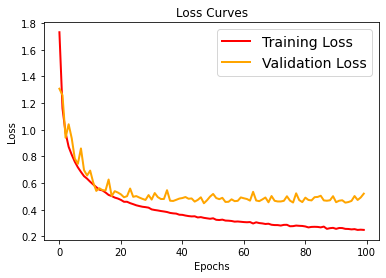

In [28]:
# training and validation loss
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'red', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orange', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

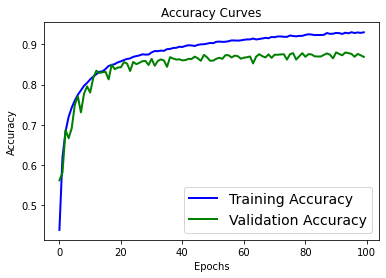

In [29]:
# Accuracy graph
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

<a id="section-ten"></a>
## Predicting the Result

Here is the fun part. Let's take 25 images from the testing data and see how many of it we predicted correctly. 

In [23]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[2.4611770e-06 2.5512945e-06 7.6354168e-05 ... 1.7599768e-05
  2.8471463e-06 2.5651127e-06]
 [1.9174218e-09 7.3975920e-05 2.3088345e-11 ... 1.8740383e-12
  9.9992597e-01 8.4489837e-09]
 [1.8989592e-04 5.4119765e-03 8.4140875e-06 ... 7.0000351e-06
  9.9416071e-01 1.5365970e-04]
 ...
 [4.0641773e-08 9.5203220e-08 2.8029688e-06 ... 3.8080145e-06
  2.6313040e-07 3.0472339e-08]
 [3.0700553e-03 9.9570650e-01 2.4102312e-04 ... 9.9075616e-05
  9.6395597e-05 1.9915447e-04]
 [1.2104466e-10 4.3808743e-10 1.4899524e-09 ... 9.9999845e-01
  2.2544109e-09 1.0388159e-09]]
[3 8 8 ... 5 1 7]


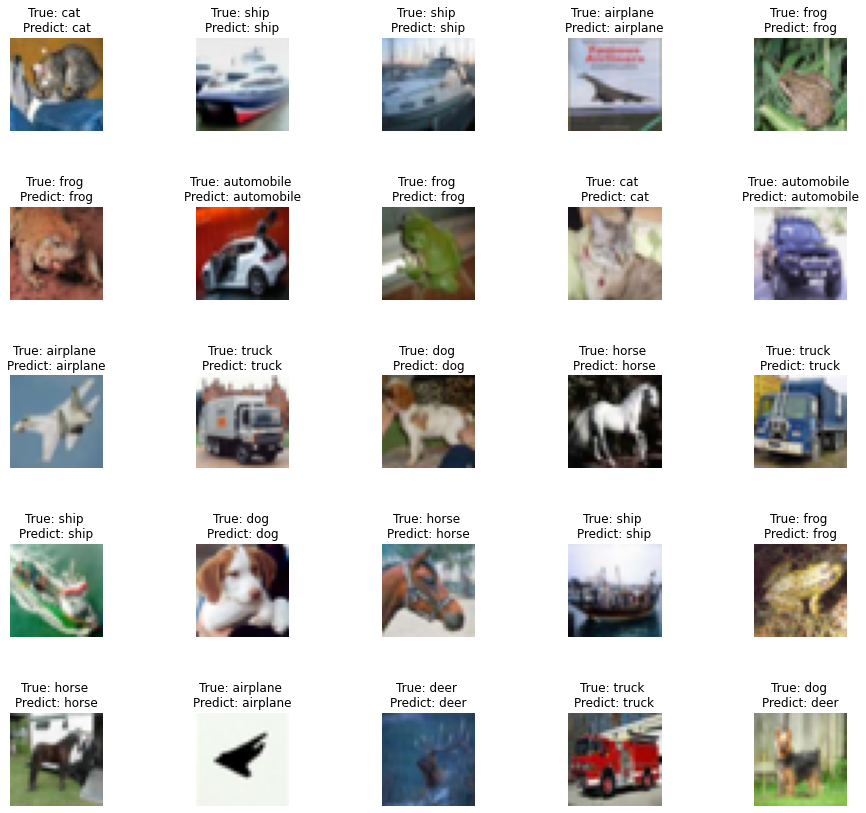

In [24]:
# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(Y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)